In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
data = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
data.info()
qualities = data.quality

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
#If the quality value is above 5, we accept the wine as quality
data["quality"] = [1 if i>data.quality.mean()+1 else 0 for i in data.quality]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [4]:
x_data = data.drop(["quality"],axis=1)
y = data.quality.values

NORMALİZATİON

In [5]:
#Normalization
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
#Create a dictionary to see all values at the end
scores = {}

TRAİN TEST SPLİT

In [6]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

# LOGISTIC REGRESSON

In [7]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train,y_train)
scores["Linear_Regression"] = lg.score(x_test,y_test)

print("Logistic Regression Accuracy = ",lg.score(x_test,y_test))

Logistic Regression Accuracy =  0.878125


# K-Nearest Neighbour Classification

KNN Accuracy :  0.90625


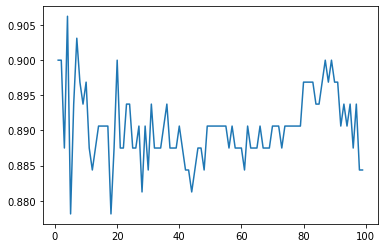

In [8]:
from sklearn.neighbors import KNeighborsClassifier

score = 0
best_n = 0
score_list = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score_temp = knn.score(x_test,y_test)
    score_list.append(score_temp)
    if score_temp > score:
        score = score_temp
        best_n = i
        
scores["KNN"] = score

print("KNN Accuracy : ",score)
plt.plot(range(1,100),score_list)

# SVM

In [9]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

scores["SVM"] = svm.score(x_test,y_test)

print("Accuracy of SVM:",svm.score(x_test,y_test))

Accuracy of SVM: 0.896875


# NAİVE BYES

In [10]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

scores["NB"] = nb.score(x_test,y_test)

print("Accuracy of Navie Byes = ",nb.score(x_test,y_test))

Accuracy of Navie Byes =  0.809375


# DECISION TREE CLASSIFIER

In [11]:
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier()
tr.fit(x_train,y_train)

scores["DecisionTree"] = nb.score(x_test,y_test)

print("Accuracy of Decision Tree = ",nb.score(x_test,y_test))

Accuracy of Decision Tree =  0.809375


# RANDOM FOREST CLASSIFIER

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)

scores["Random Forest"] = rf.score(x_test,y_test)

print("Accuracy of Random Forest:",rf.score(x_test,y_test))


Accuracy of Random Forest: 0.921875


# K-MEANS

Text(0, 0.5, 'wcss')

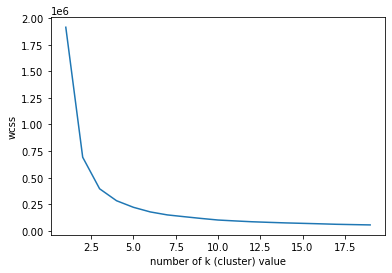

In [13]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")

* The best cluster is 3

In [14]:
kmeans2 = KMeans(n_clusters=2)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

* At least we can see which has most accuracy

In [15]:
scores

{'Linear_Regression': 0.878125,
 'KNN': 0.90625,
 'SVM': 0.896875,
 'NB': 0.809375,
 'DecisionTree': 0.809375,
 'Random Forest': 0.921875}